## Homework15
   **截止日期：**<font color=ff0000>**5.6(周五)晚** </font>
   <br>**注：**本次作业中附加题最多加1分。

### 利用ARMA进行建模


利用 ARMA 模型进行平稳序列的预测，计算对应的 MSE 误差

如果采用 AIC 或者 BIC 选择阶数，可以使用 statsmodels.tsa.stattools 里面的 arma_order_select_ic 函数来选取，用法如下

order = statsmodels.tsa.stattools.arma_order_select_ic(X, max_ar=10, max_ma=10, ic=['aic', 'bic'])

其中 max_ar 和 max_ma 表示最大选取的AR模型的阶数以及 MA 模型的阶数

ARMA 模型的使用方式大致如下

1. fit 模型 model = ARMA(data, order=(AR_p, MA_q)).fit() AR_p代表 AR部分的阶数， MA_q 代表 MA 部分的阶数
2. 预测模型 可以获得 对应模型的参数 coef =  model.params 其中前 AR_p + 1个表示 AR模型部分的参数， 后面 MA_q 个参数为 MA 模型的参数，也可以直接使用 ARMA 模型中的 predict 函数：pred = model.predict(start=start_index, end=end_index)
  

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels

df=pd.read_excel('GDP.xls')
df.head()
data1 = np.array(df.iloc[:,2:3]).reshape(-1,)

data=np.diff(data1)
while True:
    if adfuller(data)[1]>=0.05:
        data=np.diff(data)
    else:
        break
order=statsmodels.tsa.stattools.arma_order_select_ic(data, max_ar=5, max_ma=5, ic=['aic', 'bic'])
print(order['bic_min_order'])
# TODO

C:\Users\G1\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\G1\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.w

(3, 2)


C:\Users\G1\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\G1\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


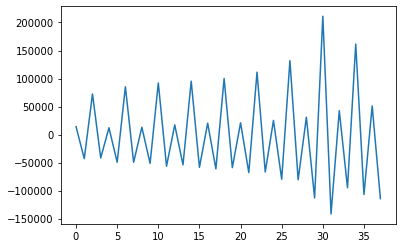

In [4]:
plt.plot(data)

In [8]:
p,q=order['bic_min_order']
model=statsmodels.tsa.arima_model.ARMA(data1,order=(p,q)).fit()
print(model.params)
pred=model.predict(start=len(data1)*5//6,end=-1)
test=data1[len(data1)*5//6:]
((test-pred)**2).sum()

[ 2.04342086e+05  5.46686015e-01  9.99999960e-01 -5.46685994e-01
  1.56526788e-01 -6.57708589e-01]


C:\Users\G1\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\G1\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4678771853.422334

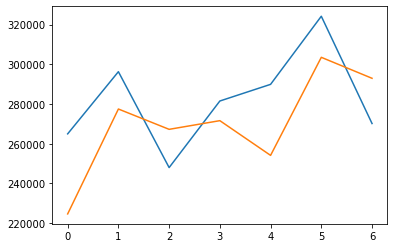

In [10]:
plt.plot(test)
plt.plot(pred)

In [2]:
import statsmodels
order = statsmodels.tsa.stattools.arma_order_select_ic(data1, max_ar=5, max_ma=5, ic=['aic', 'bic'])

C:\Users\G1\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\G1\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.w

C:\Users\G1\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\G1\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [3]:
order

{'aic':             0           1           2           3           4           5
 0  973.026793  934.165506  902.873373  881.208381  915.779807  887.049179
 1  934.039067  913.339422  895.911690  886.120715  879.710233  861.769522
 2  935.751547  914.694413  894.532701  901.830218  879.652274  862.995631
 3         NaN  819.140515  816.791708  821.711877  819.759576  846.804257
 4         NaN  817.018882  831.517589  818.005046  819.513779  842.473838
 5         NaN  819.627525  823.645817  818.690636  821.821336  822.816703,
 'bic':             0           1           2           3           4           5
 0  976.301966  939.078264  909.423718  889.396311  925.605324  898.512282
 1  938.951826  919.889766  904.099621  895.946232  891.173336  874.870211
 2  942.301892  922.882343  904.358218  913.293321  892.752963  877.733907
 3         NaN  828.966032  828.254811  834.812566  834.497851  863.180118
 4         NaN  828.481985  844.618279  832.743322  835.889640  860.487286
 5        

C:\Users\G1\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\G1\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.w

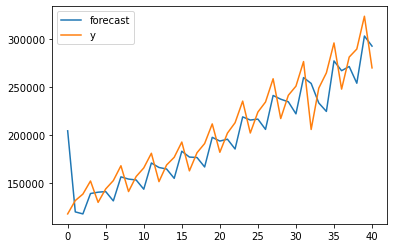

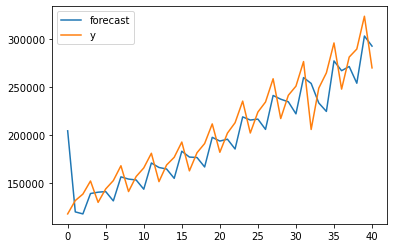

In [4]:
AR_p,MA_q=order['bic_min_order']

model = statsmodels.tsa.arima_model.ARMA(data, order=(AR_p,MA_q)).fit() 
model.plot_predict(dynamic=False)


### 使用前向算法，根据目前的观测序列，求当前天气的概率

In [22]:
import pandas as pd
import numpy as np
states = ('Rainy', 'Sunny')
 
observations = ('walk', 'shop', 'clean')
 
start_probability = {'Rainy': 0.6, 'Sunny': 0.4}
 
transition_probability = {
   'Rainy' : {'Rainy': 0.7, 'Sunny': 0.3},
   'Sunny' : {'Rainy': 0.4, 'Sunny': 0.6},
   }

A=np.array(pd.DataFrame(transition_probability))
emission_probability = {
   'Rainy' : {'walk': 0.1, 'shop': 0.4, 'clean': 0.5},
   'Sunny' : {'walk': 0.6, 'shop': 0.3, 'clean': 0.1},
   }
B=pd.DataFrame(emission_probability)
x1=np.array([0.6,0.4])


alpha1=B.loc['walk']*x1
alpha2=alpha1@A*B.loc['shop']
alpha3=alpha2@A*B.loc['clean']
print(alpha3)
probability=sum(alpha3)
print(probability)
# TODO

Rainy    0.023520
Sunny    0.004848
Name: clean, dtype: float64
0.028367999999999997


### （附加）使用维特比算法，根据目前的观测序列，推测这三天的天气

In [3]:
# TODO

(0.01344, ['Sunny', 'Rainy', 'Rainy'])